In [4]:
import pandas as pd

In [5]:
ClassData = pd.read_csv(r"C:\Users\Celeste\Downloads\ClassificationLabData.csv")
print(ClassData.head())

   age           worktype  fnlwgt EducationLevel  educationnum  \
0   54   Self-emp-not-inc   83311      Bachelors            13   
1   42            Private  215646        HS-grad             9   
2   57            Private  234721           11th             7   
3   32            Private  338409      Bachelors            13   
4   41            Private  284582        Masters            14   

        marital_status   CurrentOccupation RelationshipStatus    race  \
0   Married-civ-spouse     Exec-managerial            Husband   White   
1             Divorced   Handlers-cleaners      Not-in-family   White   
2   Married-civ-spouse   Handlers-cleaners            Husband   Black   
3   Married-civ-spouse      Prof-specialty               Wife   Black   
4   Married-civ-spouse     Exec-managerial               Wife   White   

    Gender  capitalgain  capitalloss  hoursperweek   Label  
0     Male            0            0            13   <=50K  
1     Male            0            0      

In [6]:
# Create dataframe with input data
inputs = ClassData.drop('Label', axis= 'columns')

In [7]:
# Create a dataframe with target data
target = ClassData['Label']

In [8]:
# Create objects for encoding 
from sklearn.preprocessing import LabelEncoder
le_worktype = LabelEncoder()
le_EducationLevel = LabelEncoder()
le_marital_status = LabelEncoder()
le_CurrentOccupation = LabelEncoder()
le_RelationshipStatus = LabelEncoder()
le_race = LabelEncoder()
le_Gender = LabelEncoder()

In [9]:
# Encode
inputs['worktype_n'] = le_worktype.fit_transform(inputs['worktype'])
inputs['EducationLevel_n'] = le_EducationLevel.fit_transform(inputs['EducationLevel'])
inputs['marital_status_n'] = le_marital_status.fit_transform(inputs['marital_status'])
inputs['CurrentOccupation_n'] = le_CurrentOccupation.fit_transform(inputs['CurrentOccupation'])
inputs['RelationshipStatus_n'] = le_RelationshipStatus.fit_transform(inputs['RelationshipStatus'])
inputs['race_n'] = le_race.fit_transform(inputs['race'])
inputs['Gender_n'] = le_Gender.fit_transform(inputs['Gender'])

In [10]:
print(inputs.head())

   age           worktype  fnlwgt EducationLevel  educationnum  \
0   54   Self-emp-not-inc   83311      Bachelors            13   
1   42            Private  215646        HS-grad             9   
2   57            Private  234721           11th             7   
3   32            Private  338409      Bachelors            13   
4   41            Private  284582        Masters            14   

        marital_status   CurrentOccupation RelationshipStatus    race  \
0   Married-civ-spouse     Exec-managerial            Husband   White   
1             Divorced   Handlers-cleaners      Not-in-family   White   
2   Married-civ-spouse   Handlers-cleaners            Husband   Black   
3   Married-civ-spouse      Prof-specialty               Wife   Black   
4   Married-civ-spouse     Exec-managerial               Wife   White   

    Gender  capitalgain  capitalloss  hoursperweek  worktype_n  \
0     Male            0            0            13           6   
1     Male            0         

In [11]:
inputs_n = inputs.drop(['worktype', 'EducationLevel', 'marital_status', 'CurrentOccupation', 'RelationshipStatus', 'race', 'Gender'], axis='columns')
print(inputs_n.head())

   age  fnlwgt  educationnum  capitalgain  capitalloss  hoursperweek  \
0   54   83311            13            0            0            13   
1   42  215646             9            0            0            40   
2   57  234721             7            0            0            40   
3   32  338409            13            0            0            40   
4   41  284582            14            0            0            40   

   worktype_n  EducationLevel_n  marital_status_n  CurrentOccupation_n  \
0           6                 9                 2                    4   
1           4                11                 0                    6   
2           4                 1                 2                    6   
3           4                 9                 2                   10   
4           4                12                 2                    4   

   RelationshipStatus_n  race_n  Gender_n  
0                     0       4         1  
1                     1       4   

In [12]:
# Split the data training - testing 80/20
x = inputs_n
y = target

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, stratify=y)

### Decision Tree

In [24]:
# classification - decision tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

# Training the model 
clf = clf.fit(X_train, y_train)

# Predit and test the model
y_pred = clf.predict(X_test)

# Compare
from sklearn import metrics
results = metrics.confusion_matrix(y_test, y_pred)

print('Decision Tree Confusion Matrix')
print(results)

Decision Tree Confusion Matrix
[[4330  614]
 [ 630  938]]


In [15]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
print("tn, fp, fn, tp", tn, fp, fn, tp)

tn, fp, fn, tp 4305 639 642 926


In [16]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Decision Tree Accuracy")
print(accuracy)

Decision Tree Accuracy
0.8032862407862408


In [17]:
# Catch the true positives 
sensitivity = tp / (tp + fn)

# Catch the true negatives
specificity = tn / (tn + fp)

print("Decision Tree Sensitivity")
print(sensitivity)

print("Decision Tree Specificity")
print(specificity)

Decision Tree Sensitivity
0.5905612244897959
Decision Tree Specificity
0.870752427184466


### Naive Bayes Model

In [18]:
from sklearn.naive_bayes import GaussianNB

NBmodel = GaussianNB()

# Train the model 
NBmodel.fit(X_train, y_train)

# Predict and test model 

y_pred = NBmodel.predict(X_test)

# Compare 
results = metrics.confusion_matrix(y_test, y_pred)

print("Naive Bayes Confusion Matrix")
print(results)

Naive Bayes Confusion Matrix
[[4704  240]
 [1111  457]]


In [19]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
print('Naive Bayes Accuracy')
print(accuracy)

Naive Bayes Accuracy
0.8032862407862408


In [20]:
# Catch the true positives 
sensitivity = tp / (tp + fn)

# Catch the true negatives
specificity = tn / (tn + fp)

print("Naive Bayes Sensitivity")
print(sensitivity)

print("Naive Bayes Specificity")
print(specificity)

Naive Bayes Sensitivity
0.2914540816326531
Naive Bayes Specificity
0.9514563106796117


### Visualizations

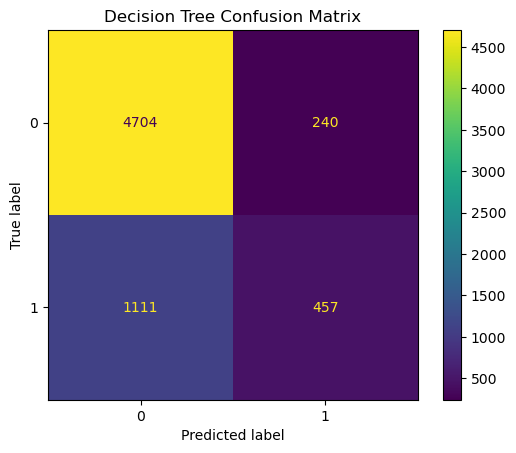

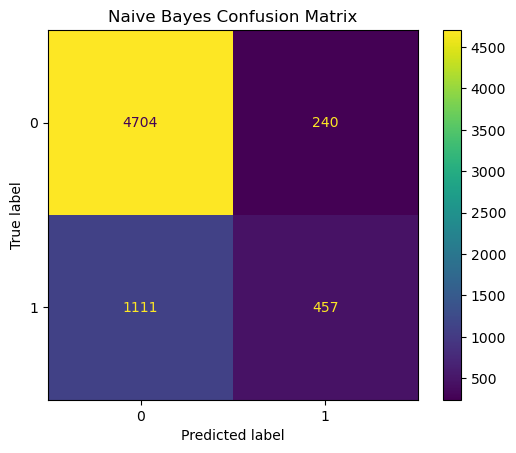

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion matrix for Decision Tree
clf = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=clf).plot()
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Confusion matrix for Naive Bayes
NBmodel = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=NBmodel).plot()
plt.title("Naive Bayes Confusion Matrix")
plt.show()

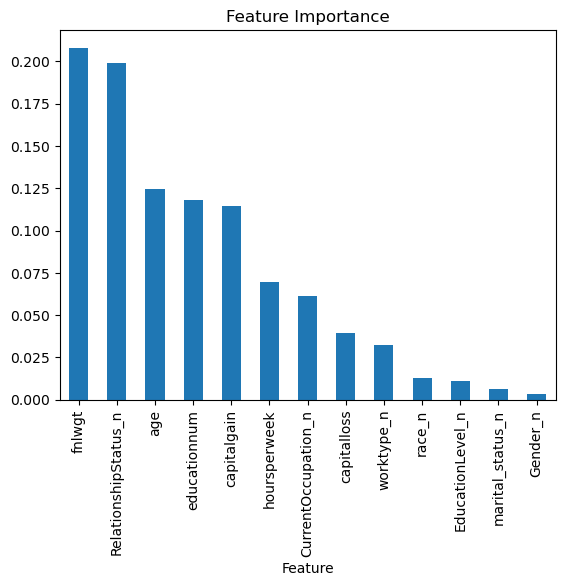

In [25]:
importance = clf.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importance})
feature_importance_df.sort_values(by="Importance", ascending=False, inplace=True)

# Bar chart
feature_importance_df.plot(kind="bar", x="Feature", y="Importance", legend=False, title="Feature Importance")
plt.show()

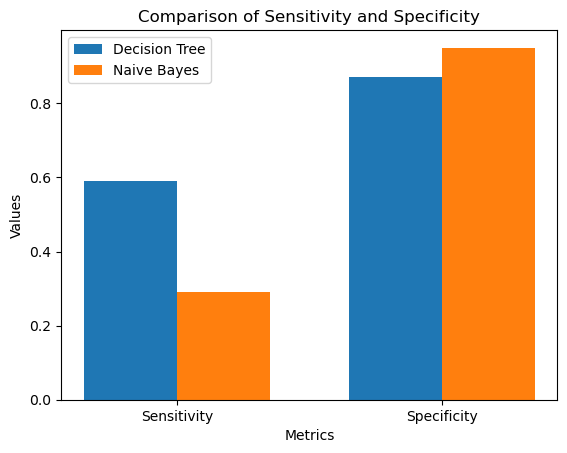

In [27]:
import numpy as np

labels = ['Sensitivity', 'Specificity']
dt_values = [0.59, 0.87]
nb_values = [0.29, 0.95]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
ax.bar(x - width/2, dt_values, width, label='Decision Tree')
ax.bar(x + width/2, nb_values, width, label='Naive Bayes')

# Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Sensitivity and Specificity')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()